In [1]:
import sys
import numpy as np
import random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [2]:
""" Generating the data """
# Ensures same randim data is generated everytime
np.random.seed(100)

# Class A: 10 points around (1.5, 0.5) and ten points around (-1.5, 0.5)
classA = np.concatenate((np.random.randn(10, 2) * 0.2 + [0.6, 0.15],
                         np.random.randn(10, 2) * 0.2 + [-0.6, 0.15]))
# Class B: 20 points around (0.0, -0.5)
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.17]

# Inputs: N x 2 array
inputs = np.concatenate((classA, classB))
# Targets: N x 1 array
targets = np.concatenate((np.ones(classA.shape[0]),
                         -np.ones(classB.shape[0])))

# Number of rows (training samples)
N = inputs.shape[0]

# Randomising
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

#print(inputs)
#print(targets)

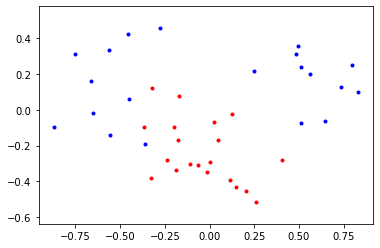

In [3]:
""" Plotting the data """
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal') # Forces same scale on both axes
plt.savefig('svmplot.pdf') # Saves a copy in a file
plt.show() # Shows the plot

In [4]:
""" SVM """

' SVM '

In [5]:
# Linear kernel
def linearKernel(x, y):
    
    return np.dot(x, y)

def polyKernel(x, y):
    p = 10
    return np.power(np.dot(x, y) + 1, p)

def rbfKernel(x, y):
    sigma = 5
    return math.exp(-math.pow(np.linalg.norm(np.subtract(x, y)), 2)/(2 * math.pow(sigma,2)))

kernel = polyKernel

In [6]:
# Create P: N x N matrix
P = np.array([[ 0. for i in range(N) ] for j in range(N)]) # Initialize P

for i in range(len(targets)):
    for j in range(len(targets)):
        P[i][j] = targets[i] * targets[j] * kernel(inputs[i], inputs[j])   
        
#print(P)

In [7]:
# Implement expression that should be minimized -> equation (4)
def objective(a):
    return 0.5 * np.dot(a, np.dot(a, P)) - np.sum(a)

#a = np.zeros(N)
#print(objective(a))

In [8]:
# Equality constraint in equation (10)
def zerofun(a):
    return np.dot(a, targets)

In [9]:
# Minimizing
C = 10   # Upper bound for a

start = np.zeros(N)    # Initial guess of a
B = [(0, C) for b in range(N)]    # Constrain a values to be in range: 0 < a < C (slacking) --> bounds
XC = {'type': 'eq', 'fun': zerofun}    # Used to impose other constraints, in addition to bounds

# Find vecor a which minimizes the function "objective" within bounds "B" and constraints "XC"
ret = minimize(objective, start, bounds = B, constraints = XC)

alpha = ret['x']
success = ret['success']

#print(alpha)
print(success)

True


In [10]:
def getSV(a):
    
    a0 = []    # alphas > 0
    SV = []    # associated SVs
    tSV = []   # associated targets
    
    for i in range(len(a)):
        if alpha[i] >= 0.0001:
            a0.append(alpha[i])
            SV.append(inputs[i])
            tSV.append(targets[i])
                   
    return np.array(a0), np.array(SV), np.array(tSV)

a0, SV, tSV = getSV(alpha)
print(a0)
#print(SV)
#print(tSV)

[ 0.06351745  2.08145227  3.51913139  0.43756039  1.26311686  3.07483892
 10.         10.        ]


In [11]:
# Computing b -> equation (7)
def getB():
    b = 0
    # Using first SV to get b
    for i in range(len(a0)):
        b += a0[i] * tSV[i] * kernel(SV[0], SV[i])

    return b - tSV[0]

b = getB()
print(b)

1.6400926766903887


In [12]:
def indicator(x, y):
    ind = 0
    for i in range(len(a0)):
        ind += a0[i] * tSV[i] * kernel([x, y], SV[i])
 
    return ind - b

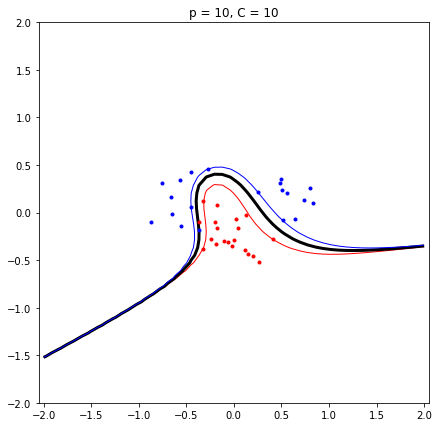

In [13]:
""" Plotting the data """
plt.figure(figsize=(7, 7))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
#plt.plot([p[0] for p in SV], [p[1] for p in SV], 'yo')

plt.axis('equal') # Forces same scale on both axes

""" Plotting hyperplane """
xgrid = np.linspace(-2, 2)
ygrid = np.linspace(-2, 2)

grid = np.array([[indicator(x, y)
                  for x in xgrid]
                 for y in ygrid])

plt.contour(xgrid, ygrid, grid,
            (-1.0, 0.0, 1.0),
            colors = ('red', 'black', 'blue'),
            linewidths = (1, 3, 1))

plt.title('p = 10, C = 10')
plt.savefig('poly_10_10.pdf') # Saves a copy in a file
plt.show() # Shows the plot